In [1]:
import pandas as pd
import os
import re
import numpy as np

#### ANES voter data

In [2]:
anes_data = pd.read_csv("anes_timeseries_2016_rawdata.txt", sep="|")

c:\python27\miniconda\envs\pyconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (682,685,779) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Answer Key Extraction
Regex cleaning up of key

In [6]:
headers = open("sas/anes_timeseries_2016_codelabelsdefine.sas", "r")
column_def = [row for row in headers]

#  pull out answers for seperate questions
col_heads = [column_def.index(row) for row in column_def if "VALUE" in row]

#  place them in a dictionary
answer_key = {}
for index_val in col_heads:
    try:
        responses = column_def[index_val+1: col_heads[col_heads.index(index_val)+1]-1]
        answer_key[column_def[index_val]] = {key_response.split("=")[0]: key_response.split("=")[1] for key_response in responses}
    except IndexError:
        responses = column_def[index_val+1: col_heads[-2]]
        answer_key[column_def[index_val]] = {key_response.split("=")[0]: key_response.split("=")[1] for key_response in responses}

#  Regex elements
answer_regex = re.compile(r"(?=\s)[a-z \'\,\-A-Z]*")
key_regex = re.compile(r"[\-]{0,1}\d+")
question_regex = re.compile(r"V\d{6}[a|b|c|d|f|w|x]{0,1}")
    
#answer_copy = answer_key

answer_formatted = {}

for key, value in answer_key.items():
    question_formatted = question_regex.search(key).group()
    #  add format for question name
    answer_formatted[question_formatted] = {}
    for key2, value2 in value.items():
        value_formatted = answer_regex.findall(value2)
        #value2 = value_formatted.lstrip() #  removed leading whitespaces
        key2 = key_regex.search(key2).group()
        answer_formatted[question_formatted][int(key2)] = value_formatted[1].lstrip()

In [10]:
#  testing index method
for index_val in col_heads:
    print(column_def[index_val], column_def[index_val+1: col_heads[col_heads.index(index_val)+1]-1])

   VALUE V160501_
 ['\t1   = "1. FTF/CASI"\n', '\t2   = "2. Web"\n']
   VALUE V160502_
 ['\t0   = "0. Pre interview completed- no completed Post interview"\n', '\t1   = "1. Pre and Post interviews completed"\n']
   VALUE V161001_
 ['\t-9  = "-9. Refused"\n', '\t-8  = "-8. Don\'t know (FTF only)"\n', '\t-1  = "-1. Inap, Web mode"\n', '\t1   = "1. Continue"\n', '\t7   = "7. Refuse to allow audio recording"\n']
   VALUE V161002_
 ['\t-9  = "-9. Refused"\n', '\t-8  = "-8. Don\'t know (FTF only)"\n', '\t-1  = "-1. Inap, Web mode"\n', '\t1   = "1. Male"\n', '\t2   = "2. Female"\n']
   VALUE V161003_
 ['\t-9  = "-9. Refused"\n', '\t-8  = "-8. Don\'t know (FTF only)"\n', '\t1   = "1. Always"\n', '\t2   = "2. Most of the time"\n', '\t3   = "3. About half the time"\n', '\t4   = "4. Some of the time"\n', '\t5   = "5. Never"\n']
   VALUE V161004_
 ['\t-9  = "-9. Refused"\n', '\t-8  = "-8. Don\'t know (FTF only)"\n', '\t1   = "1. Very much interested"\n', '\t2   = "2. Somewhat interested"\n', '\t3 

 ['\t-9  = "-9. Refused"\n', '\t-8  = "-8. Don\'t know (FTF only)"\n', '\t-1  = "-1. Inap, 1,4 in V161024x"\n', '\t1   = "1. Yes"\n', '\t2   = "2. No"\n']
   VALUE V161031_
 ['\t-9  = "-9. Refused"\n', '\t-8  = "-8. Don\'t know (FTF only)"\n', '\t-1  = "-1. Inap, 2,-8,-9 in V161030; 1,4 in V161024x"\n', '\t1   = "1. Hillary Clinton"\n', '\t2   = "2. Donald Trump"\n', '\t3   = "3. Gary Johnson"\n', '\t4   = "4. Jill Stein"\n', '\t5   = "5. Other candidate {SPECIFY}"\n', '\t6   = "6. Other specify - specified as: DK"\n', '\t7   = "7. Other specify - specified as: RF"\n', '\t8   = "8. Other specify - specified as: none/no one/NA"\n']
   VALUE V161032_
 ['\t-9  = "-9. Refused"\n', '\t-8  = "-8. Don\'t know (FTF only)"\n', '\t-1  = "-1. Inap, -8,-9 in V161031; 2,-8,-9 in V161030; 1,4 in V161024x"\n', '\t1   = "1. Strong"\n', '\t2   = "2. Not strong"\n']
   VALUE V161033_
 ['\t-9  = "-9. Refused"\n', '\t-8  = "-8. Don\'t know (FTF only)"\n', '\t-1  = "-1. Inap, 2,3,4 in V161024x; WEB: 1 in V

 ['\t-9 = "-9. Refused"\n', '\t-7 = "-7. No post data, deleted due to incomplete IW"\n', '\t-6 = "-6. No post-election interview"\n', '\t-1 = "-1. Inap"\n', '\t1 = "1. Lower middle class"\n', '\t2 = "2. Middle class"\n', '\t3 = "3. Upper middle class"\n']
   VALUE V162134_
 ['\t-9 = "-9. Refused"\n', '\t-8 = "-8. Don\'t know"\n', '\t-7 = "-7. No post data, deleted due to incomplete IW"\n', '\t-6 = "-6. No post-election interview"\n', '\t1 = "1. A great deal"\n', '\t2 = "2. A lot"\n', '\t3 = "3. A moderate amount"\n', '\t4 = "4. A little"\n', '\t5 = "5. None"\n']
   VALUE V162135_
 ['\t-9 = "-9. Refused"\n', '\t-8 = "-8. Don\'t know"\n', '\t-7 = "-7. No post data, deleted due to incomplete IW"\n', '\t-6 = "-6. No post-election interview"\n', '\t1 = "1. Easier"\n', '\t2 = "2. Harder"\n', '\t3 = "3. The same"\n']
   VALUE V162136_
 ['\t-9 = "-9. Refused"\n', '\t-7 = "-7. No post data, deleted due to incomplete IW"\n', '\t-6 = "-6. No post-election interview"\n', '\t-1 = "-1. Inap"\n', '\t

IndexError: list index out of range

#### Mapping Answer Key to ANES data

In [9]:
#  Map answers to key in a given question
for col in list(anes_data.columns):
    #print col, type(col)
    try:
        anes_data[col] = anes_data[col].map(answer_formatted[col])
        #print anes_data[col].unique()
    except KeyError:
        print("no match found for {}".format(col))
        pass


no match found for version
no match found for V160001
no match found for V160101
no match found for V160101f
no match found for V160101w
no match found for V160102
no match found for V160102f
no match found for V160102w
no match found for V160201
no match found for V160201f
no match found for V160201w
no match found for V160202
no match found for V160202f
no match found for V160202w
no match found for V161010e
no match found for V161010f
no match found for V161015e
no match found for V161266e
no match found for V161266g
no match found for V161266h
no match found for V161266j
no match found for V161266k
no match found for V161266m
no match found for V161266n
no match found for V161266p
no match found for V161267x
no match found for V161300e
no match found for V161300g
no match found for V161310e
no match found for V161310g
no match found for V161325e
no match found for V161363e
no match found for V162018e
no match found for V162026e
no match found for V163001b
no match found for V163002

#### Question Labels

In [5]:
labels = [line.split("=") for line in open("sas/anes_timeseries_2016_varlabels.sas", "r") if "LABEL" or ";" not in line]

question_dict = {}
for row in labels:
    try:
        question_dict[row[0].replace(" ", "")] = row[1]
    except IndexError:
        pass

#### Removing Questions with Multiple NA Responses 

Removed all columns with too many NA values. <br></br>
I chose 75% as a cuttoff point for removing NA responses

In [29]:
null_cols = []
#count = 0
for col in list(anes_data.columns):
    null_count = float(anes_data[col].isnull().sum()) / float(len(anes_data[col])) 
    if null_count > .75:
        print "{} has {} null responses".format(question_dict[col], null_count)
        #count += 1
        null_cols.append(col)

print "--------- \n {} questions with >75% null values \n ".format(count)
print "{} of columns have > 75% of answers null".format(len(null_cols)/len(anes_data.columns))

 "PRE: Feeling Thermometer: Democratic Presidential cand"
 has 0.991102786233 null responses
 "PRE: Feeling Thermometer: Republican Presidential cand"
 has 0.99040037462 null responses
 "PRE: Feeling Thermometer: Libertarian Presidential cand"
 has 0.755560758605 null responses
 "PRE: Feeling Thermometer: Democratic Vice-Pres cand"
 has 0.800749239054 null responses
 "PRE: Feeling Thermometer: Republican Vice-Pres cand"
 has 0.842191524233 null responses
 "PRE: Feeling Thermometer: Previous President"
 has 0.995083118708 null responses
 "PRE: Feeling Thermometer: Bill Clinton"
 has 0.991571060642 null responses
 "PRE: Feeling Thermometer: Democratic Party"
 has 0.983610395692 null responses
 "PRE: Feeling Thermometer: Republican Party"
 has 0.979864200421 null responses
 "PRE: R living with how many family members"
 has 0.998595176774 null responses
 "PRE: 7pt scale defense spending Dem Pres cand"
 has 0.815265745727 null responses
 "PRE: Respondent age"
 has 0.965347693749 null respon

NameError: name 'count' is not defined

In [17]:
len(null_cols)
anes_data = anes_data.drop(null_cols, axis=1)    

Appending Column Names to ANES dataframe

In [39]:
anes_data.iloc[:,0:10]

,version,V160001,V160101,V160101f,V160101w,V160102,V160102f,V160102w,V160201,V160201f
0,ANES2016TimeSeries_20170502,300001,0.8270,0.8877,0.0000,0.8420,0.9271,0.0000,121,21
1,ANES2016TimeSeries_20170502,300002,1.0806,1.1605,0.0000,1.0133,1.0841,0.0000,123,23
2,ANES2016TimeSeries_20170502,300003,0.3878,0.4161,0.0000,0.3672,0.3985,0.0000,121,21
3,ANES2016TimeSeries_20170502,300004,0.3596,0.3852,0.0000,0.3663,0.4183,0.0000,118,18
4,ANES2016TimeSeries_20170502,300006,0.6470,0.6931,0.0000,0.6463,0.7262,0.0000,113,13
5,ANES2016TimeSeries_20170502,300007,0.7062,0.7588,0.0000,0.6881,0.7246,0.0000,104,4
6,ANES2016TimeSeries_20170502,300008,3.9604,4.2512,0.0000,4.6151,4.7902,0.0000,105,5
7,ANES2016TimeSeries_20170502,300012,0.9620,1.0325,0.0000,0.9426,1.0410,0.0000,104,4
8,ANES2016TimeSeries_20170502,300018,0.9761,1.0481,0.0000,1.0097,1.0733,0.0000,124,24
9,ANES2016TimeSeries_20170502,300020,0.6182,0.6642,0.0000,0.6005,0.6375,0.0000,121,21


In [7]:
anes_data_cols = anes_data.rename(columns=question_dict)

#### Converting Sample to CSV File

In [37]:
anes_data_sample = anes_data_cols[:200]
anes_data_sample.to_csv("ANES_Sample_Cleaned_v1.csv", index=False) #  Include fill for na values

#### Sample Value Counts

Compare a subset of voters against the total and see if there are any substantive differences in their perspectives on the United States. 

Question to Compare 
-  <font color=red>V161111 - R how much better worse off next year</font>

Subset Questions
-  <font color=green>V161006 - Recall of last 2012 Presidential vote choice</font>
-  <font color=green>V162034a - POST: for whom did R vote for President?</font>

In [18]:
anes_data["V161006"].value_counts()

 Barack Obama                    1728
 Mitt Romney                     1268
 Inap,                           1154
 Other SPECIFY                     58
 Refused                           47
 Don't know                        13
 Other specify - specified as       3
Name: V161006, dtype: int64

In [10]:
answer_formatted["V162034a"]

{-9: 'Refused',
 -8: "Don't know ",
 -7: 'No Post, deleted due to insufficient partial',
 -6: 'Unit nonresponse, no Post-Election interview',
 -1: 'INAP, ',
 1: 'Hillary Clinton',
 2: 'Donald Trump',
 3: 'Gary Johnson',
 4: 'Jill Steiin',
 5: 'Other candidate SPECIFY',
 7: 'Other specify given as',
 9: 'Other specify given as'}

In [18]:
anes_data["V162034a"].value_counts()

Hillary Clinton                                 1290
Donald Trump                                    1178
INAP,                                            958
Unit nonresponse, no Post-Election interview     536
Gary Johnson                                     115
No Post, deleted due to insufficient partial      86
Other candidate SPECIFY                           39
Jill Steiin                                       31
Refused                                           26
Other specify given as                            10
Don't know                                         2
Name: V162034a, dtype: int64

In [6]:
voted_r = anes_data[anes_data["V162034a"] == "Donald Trump"]
voted_d = anes_data[anes_data["V162034a"] == "Hillary Clinton"]
voted_r16 = voted_r[voted_r["V161006"] == "Barack Obama"]
print "Voted Republican in 2016: %d" % (len(voted_r))
print "Voted Democrat in 2016: %d" % (len(voted_d))
print "Voted democrat in 2012 and republican in 2016: %d" % (len(voted_r16))

Voted Republican in 2016: 1178
Voted Democrat in 2016: 1290
Voted democrat in 2012 and republican in 2016: 147


Cummulative Frequency table example

In [37]:
rep_dif = []
dem_dif = []
question = []
for col in list(anes_data.columns):
    cumu_col = pd.Series(anes_data[col].value_counts()/ anes_data[col].value_counts().sum())
    cumu_r16_col = pd.Series(voted_r16[col].value_counts() / voted_r16[col].value_counts().sum())
    cumu_d_col = pd.Series(voted_d[col].value_counts() / voted_r16[col].value_counts().sum())

    rep_dif.append(abs(cumu_col - cumu_r16_col).sum())
    dem_dif.append(abs(cumu_col - cumu_r16_col).sum())
    question.append(col+"--"+question_dict.get(col, " "))

rep_comparisson = pd.Series(rep_dif, index=question) #  difference for Republicans
dem_comparisson = pd.Series(dem_dif, index=question) #  difference for Democrats

In [38]:
dem_comparisson.sort_values(ascending=False)

V160001-- "2016 Case ID"\n                                                                       0.965582
V160102-- "Post-election weight -full sample"\n                                                  0.925779
V160101-- "Pre-election weight -full sample"\n                                                   0.917584
V162286-- "POST: CSES: 10pt scale: like-dislike Republican Pres cand"\n                          0.850472
V161031-- "PRE: For whom does R intend to vote for President"\n                                  0.844206
V162284-- "POST: CSES: 10pt scale: like-dislike Republican Party"\n                              0.791159
V162127-- "POST: Does Rep Presidential cand Trump 2005 video about women matter"\n               0.782155
V162188x-- "POST: SUMMARY- How does Rep Presidential candidate treat women"\n                    0.761892
V162283-- "POST: CSES: 10pt scale: like-dislike Democratic Party"\n                              0.747158
V162034a-- "POST: For whom did R vote for Pres

##### Graphing differences in respondents questions

Initial Question
<font color=Green>V162127 - POST: Does Rep Presidential cand Trump 2005 video about women matter</font>

#### grouping - v1

In [55]:
subsets = {"total": anes_data, "Democrat": voted_d, "Republican": voted_r}
def iter_response(subsets):
    for name, frame in subsets.items():
        yield pd.Series(frame["V162127"].value_counts() / 
                        frame["V162127"].value_counts().sum(), index=frame["V162127"].value_counts().index)

v162127_resp = list(iter_response(subsets))

v162127_resp_df = pd.DataFrame(v162127_resp).T

#### grouping - v2

In [108]:
subsets = {"Democrat": voted_d, "Republican": voted_r}
base = pd.DataFrame({"Total": anes_data.groupby("V162127")["V162127"].count()})

for subset, frame in subsets.items():
    sub_frame = pd.DataFrame({subset : frame.groupby("V162127")["V162127"].count()})
    base = base.merge(sub_frame, left_index=True, right_index=True)
    
#  Drop Inapplicable values
base = base.drop('Inap')

#  Return precentages
base = base/ base.sum()

# Sort Values
sorter = ['A great deal', 'A lot', 'A moderate amount', 'A little', 'Not at all', 'Refused']
base = base.loc[sorter]

# Rename index column
base.index.name = question_dict[base.index.name]

In [109]:
base

,Total,Republican,Democrat
"""POST: Does Rep Presidential cand Trump 2005 video about women matter""",,,
A great deal,0.299677,0.017825,0.574502
A lot,0.138832,0.038324,0.221514
A moderate amount,0.186087,0.209447,0.121912
A little,0.181978,0.350267,0.048606
Not at all,0.191958,0.383244,0.032669
Refused,0.001468,0.000891,0.000797


' "POST: Does Rep Presidential cand Trump 2005 video about women matter"\n'

#### Iterate through multiple Multiple Questions

In [7]:
def op_select(frame):
    for col in list(frame.columns):
        if "A great deal" in frame[col].value_counts().index:
            yield col

In [8]:
# returns a list of opinion questions (Questions where one of the possible responses was "A great deal")
op_questions = list(op_select(anes_data))
print len(op_questions)

52


In [9]:
#  Grouping dataframe function
def opinion_frames(frame, subsets, op_questions, question_dict):
    for col in op_questions:
        base = pd.DataFrame({"Total": frame.groupby(col)[col].count()})
        for sub, segment_frame in subsets.items():
            subframe = pd.DataFrame({sub: segment_frame.groupby(col)[col].count()})
            base = base.merge(subframe, left_index=True, right_index=True, how="outer")
        
        #base = base.drop('Inap')
        sorter = ['A great deal', 'A lot', 'A moderate amount', 'A little', 'Not at all', 'Refused']
        base = base.loc[sorter]
            
        #  Calculate distribution of responses for frame
        base = base / base.sum()

        # Rename index column
        base.index.name = question_dict[base.index.name]
        
        yield col, base
        

In [10]:
subsets = {"Democrat": voted_d, "Republican": voted_r}
opinions = dict(opinion_frames(anes_data, subsets, op_questions, question_dict))

In [11]:
# Checking Cummulative Sums of top frequency tables
for col in op_questions[:5]:
    print question_dict[col], opinions[col].sum()

 "PRE: Attention to news on any media"
Total         1.0
Republican    1.0
Democrat      1.0
dtype: float64
 "PRE: Strength favor 2010 health care law"
Total         1.0
Republican    1.0
Democrat      1.0
dtype: float64
 "PRE: Strength oppose 2010 health carelaw"
Total         1.0
Republican    1.0
Democrat      1.0
dtype: float64
 "PRE: Care who wins Presidential Election revised version"
Total         1.0
Republican    1.0
Democrat      1.0
dtype: float64
 "PRE: Serious third party or independent Pres cand choice"
Total         1.0
Republican    1.0
Democrat      1.0
dtype: float64


In [12]:
test = opinions[op_questions[4]]

In [25]:
test

,Total,Republican,Democrat
"""PRE: Serious third party or independent Pres cand choice""",,,
A great deal,1.0,0.881426,0.907468
A lot,1.0,0.968123,1.089193
A moderate amount,1.0,0.992381,0.971230
A little,1.0,1.145274,1.013776
Not at all,1.0,1.127401,1.094661
Refused,1.0,0.572637,0.522437


In [61]:
test["Republican"] = test["Republican"] / test["Total"]
test["Democrat"] = test["Democrat"] / test["Total"]
test["Total"] = test["Total"] / test["Total"]

test

,Total,Republican,Democrat
"""PRE: Strength favor 2010 health care law""",,,
A great deal,1.0,0.701754,0.901487
A lot,NaN,NaN,NaN
A moderate amount,NaN,NaN,NaN
A little,1.0,0.298246,0.096654
Not at all,NaN,NaN,NaN
Refused,1.0,NaN,0.001859


In [14]:
opinions_index = opinions.copy()
for responses, question in opinions_index.items():
    question["Republican"] = question["Republican"] / question["Total"]
    question["Democrat"] = question["Democrat"] / question["Total"]
    question["Total"] = question["Total"] / question["Total"]

In [24]:
for responses, questions in opinions_index.items():
    for row in range(len(questions)):
        for col in range(len(questions.columns)):
            if questions.iloc[row,col] > 1.5:
                print questions.index.name, "\t", questions.columns[col],  questions.index[row], questions.iloc[row, col], opinions[responses].iloc[row,col]

 "PRE: Strength oppose 2010 health carelaw"
	Democrat A little 3.20786142572 3.20786142572
 "PRE: Strength favor 2010 health care law"
	Republican A little 2.32147937411 2.32147937411
 "PRE: Strength favor 2010 health care law"
	Democrat Refused 1.60594795539 1.60594795539
 "POST: How much favor or oppose requiring equal pay for men and women"
	Republican Refused 3.18726235741 3.18726235741
 "PRE: Attention to news on any media"
	Republican Refused 3.55872193437 3.55872193437
 "PRE: Care who wins Presidential Election revised version"
	Republican Refused 1.81308411215 1.81308411215
 "PRE: Build a wall with Mexico strength follow-up"
	Democrat Refused 3.03571428571 3.03571428571
 "PRE: How much does R oppose affirmative action in universities"
	Democrat A little 1.81668361443 1.81668361443
 "POST: FTF CASI/WEB: Discrimination in the U.S. against Women"
	Democrat A great deal 1.62811657068 1.62811657068
 "POST: FTF CASI/WEB: Discrimination in the U.S. against Women"
	Democrat A lot 1.542

##### Plotting Data

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
sns.set_style('white')

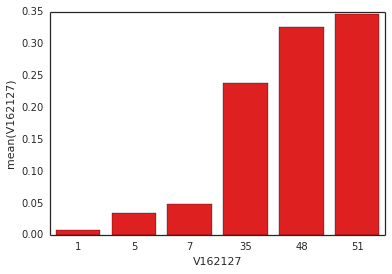

In [102]:
sns.barplot(y=pd.Series(voted_r16["V162127"].value_counts()/pd.Series(voted_r16["V162127"]).value_counts().sum()), 
            x=pd.Series(voted_r16["V162127"].value_counts()), 
            data=voted_r16, 
            color="r")

# Add labels to x axis

TypeError: cannot concatenate 'str' and 'float' objects

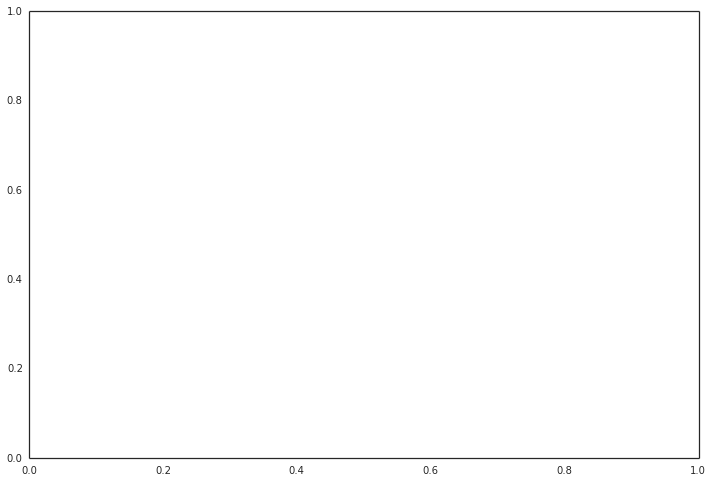

In [54]:


#matplotlib bar graph
fig, ax = plt.subplots(figsize=(12, 8))

#bar width
bar_width = 0.15

plt1 = ax.bar(v162127_resp_df.index, v162127_resp_df, bar_width, color="r", label="Electorate - Voted Trump")
plt2 = ax.bar(v162127_resp_df.index+bar_width, v162127_resp_df, bar_width, color="g", label="Electorate - Overall")
pl3 = ax.bar(v162127_resp_df.index+(bar_width*2), vv162127_resp_df, bar_width, color="b", label="Electorate - Voted Hillary")

plt.title("Does A Candidates Views on Women Matter: Cummulative Distribution")
plt.xticks(answer_index + bar_width / 2, (voted_r16["V162127"].unique()))

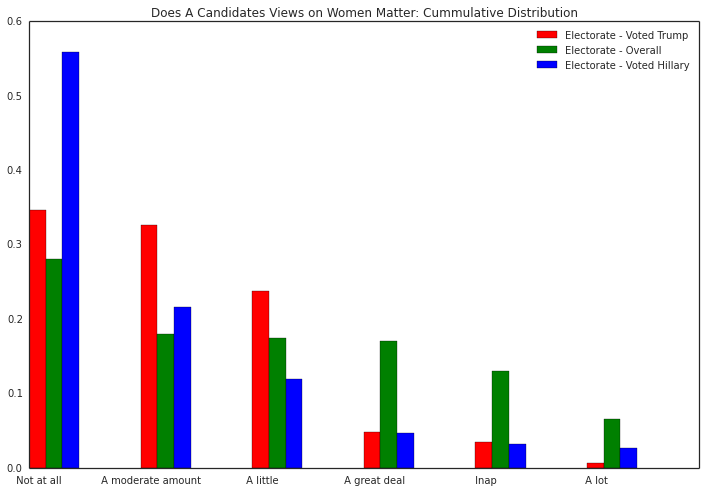

In [144]:
pop_opinion = anes_data[anes_data["V162127"].isin(list(voted_r16["V162127"].unique()))]
voted_d_formatted = voted_d[voted_d["V162127"].isin(list(voted_r16["V162127"].unique()))]

#Series for responses
voted_r16_opinion=pd.Series(voted_r16["V162127"].value_counts()/pd.Series(voted_r16["V162127"]).value_counts().sum())
total_opinion = pd.Series(pop_opinion["V162127"].value_counts()/pd.Series(pop_opinion["V162127"]).value_counts().sum())
voted_d_opinion = pd.Series(voted_d_formatted["V162127"].value_counts()/pd.Series(voted_d_formatted["V162127"]).value_counts().sum())


voted_r16_op_array = np.array(voted_r16_opinion)
total_op_array = np.array(total_opinion)
voted_d_array = np.array(voted_d_opinion)

#creating index to space bars on
answer_index = np.arange(len(voted_r16["V162127"].unique()))

#matplotlib bar graph
fig, ax = plt.subplots(figsize=(12, 8))

#bar width
bar_width = 0.15

plt1 = ax.bar(answer_index, voted_r16_op_array, bar_width, color="r", label="Electorate - Voted Trump")
plt2 = ax.bar(answer_index+bar_width, total_op_array, bar_width, color="g", label="Electorate - Overall")
pl3 = ax.bar(answer_index+(bar_width*2), voted_d_array, bar_width, color="b", label="Electorate - Voted Hillary")

plt.title("Does A Candidates Views on Women Matter: Cummulative Distribution")
plt.xticks(answer_index + bar_width / 2, (voted_r16["V162127"].unique()))
plt.legend()

In [117]:
voted_r16_op_array

array([ 0.34693878,  0.32653061,  0.23809524,  0.04761905,  0.03401361,
        0.00680272])

In [118]:
answer_index

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

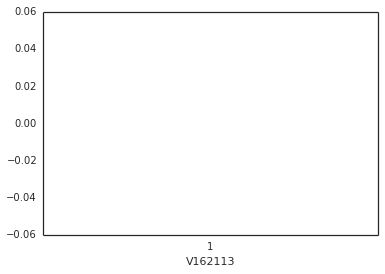

In [79]:
# Question V162113
voted_r16_blm = pd.Series(voted_r16["V162113"].value_counts()) / pd.Series(voted_r16["V162113"].value_counts().sum()) 

sns.barplot( y=pd.Series(voted_r16["V162113"].value_counts()) / pd.Series(voted_r16["V162113"].value_counts().sum()),
            x=pd.Series(voted_r16["V162113"].value_counts()),
            data=voted_r16, 
            color="g")

In [76]:
plt.bar??

#### Converting Respondents to Bulk Groups Based on Response

In [27]:
answers = []
for col in list(anes_data.iloc[:,6:].columns):
    answer_key = anes_data[col].value_counts()
    print col, answer_key.index
    #  print answer_key
    [answers.append(key) for key in list(answer_key.index) if key not in answers]

V160102f Float64Index([   0.0,  0.843,   0.72, 0.7913, 0.3882, 0.7291, 1.7148, 0.9973,
              0.6508, 0.4825,
              ...
              0.4259, 1.0713,  1.627, 1.6039, 0.5031, 0.5381, 1.3921, 0.7201,
              0.4497, 0.6028],
             dtype='float64', length=1002)
V160102w Float64Index([   0.0, 0.6016, 0.8066, 0.8613, 0.7147, 0.5852, 0.8123, 0.7348,
              0.7422,  0.918,
              ...
              0.5363, 3.6133, 1.7499, 1.5108,  1.906, 0.6546, 1.2431, 0.4058,
              0.3519, 1.5516],
             dtype='float64', length=1697)
V160201 Int64Index([123, 121, 126, 118, 108, 107, 106, 112, 125, 119,
            ...
             44,  37,   4, 122,  28, 133, 105, 130, 128, 111],
           dtype='int64', length=132)
V160201f Int64Index([ 0, 23, 26, 21, 18,  8,  7,  6, 25, 12, 19,  1, 16, 10, 32, 29, 31,
            17, 13,  9, 24, 14, 15,  4, 27, 20,  3, 22, 33,  5, 30, 28, 11],
           dtype='int64')
V160201w Int64Index([ 0, 53, 30, 94, 87, 80, 79

           dtype='int64')
V161087 Int64Index([  0,  70,  60,  85,  15, 100,  30,  40,  50,   1,   2, -99,  61,
             10,  86,  90,   3,  75,   5,  71,  16,  41,  80,  65,  17,  51,
             20,  62,  95,  99,  84,  31,   6,  72,   4,  32,  69,   9,  42,
             52,  35,  98,  49,  25,  55,   8,  93,  57,  77,  45,  73,  97,
             63,   7,  94,  87,  96, -88,  68,  83,  59,  24,  12,  43,  74,
             54,  39,  53,  81,  82,  14,  89,  34,  21,  26,  48,  22,  91,
             46,  56,  58,  18,  64,  67,  76,  27,  92,  33,  29,  78,  11,
             36,  28,  19,  88,  47],
           dtype='int64')
V161088 Int64Index([ 50, -99, -89,  60,   0,  40,  30,  15,  70,  51,  85, -88,  52,
              1, 100,  49,   2,  61,  10,  16,  31,  17,  41,  55,  53,  65,
             99,  75,  71,  20,  80,   5,  48,  59,  25,  45,  69,  42,  54,
             18,   3,  68,  56,  39,  33,  62,  67,   6,  86,  46,  36,  58,
             14,  11,  72,  87,  64,  29,  74, 

           dtype='int64')
V161136 Int64Index([2, 1, 3, -8, -9], dtype='int64')
V161137 Int64Index([1, 3, 2, -8, -9], dtype='int64')
V161138a Int64Index([1, 2, -1, -9, -8], dtype='int64')
V161138b Int64Index([-1, 2, 1], dtype='int64')
V161138x Int64Index([1, 2, 3, 4, 5, -1], dtype='int64')
V161139 Int64Index([3, 4, 2, 5, 1, -9, -8], dtype='int64')
V161140 Int64Index([2, 3, 1, -9, -8], dtype='int64')
V161140a Int64Index([-1, 2, 1, -9], dtype='int64')
V161140x Int64Index([3, 2, 4, 5, 1, -1], dtype='int64')
V161141 Int64Index([2, 1, 3, -8, -9], dtype='int64')
V161141a Int64Index([-1, 2, 1, -9, -8], dtype='int64')
V161141x Int64Index([3, 2, 4, 5, 1, -1], dtype='int64')
V161142 Int64Index([2, 1, 3, -8, -9], dtype='int64')
V161142a Int64Index([2, -1, 1, -9, -8], dtype='int64')
V161142x Int64Index([3, 2, 4, 5, 1, -1], dtype='int64')
V161143 Int64Index([2, 1, 3, -8, -9], dtype='int64')
V161144 Int64Index([2, 3, 1, -8, -9, 4], dtype='int64')
V161145 Int64Index([1, 2, 3, 4, 5, -9, -8], dtype='int

           dtype='int64')
V161239b Int64Index([ -1,  40,  45,  50,  60,  48,  30,  49,  52,  51,  55,  -4,  47,
             35,  -8,  46,  42,  -9,  44,  53,  43,  20,  70,  41,  25,   0,
             75,  39,  80,  15,  38,  10,  37,  57,  58, 100,  54,  65,  90,
             36,  56,   5,  32,  34,  62,   1,  33,  31,  64,  59,  89,  85,
              4,  24,  68, 150,  16,  28,  67,   8,  61, 110,  98,  94,  95,
             86,  88,  96, 200,  13, 125,  93, 659],
           dtype='int64')
V161240a Int64Index([ -1,  60,  40,  50,  55,  70,  45,  30,  49,  80,  48,  -4,  65,
             52,  51,  75,  20,  -8,  35,  25,  90,  -9,  53,  46,  85,  10,
             47, 100,  44,  42,  58,  15,   0,  54,  56,  38,  43,  57,  39,
             41,  32,   5,  33,  95,  78,  67,  36,  68,   2,  63,  62,  61,
             88,  59,  16,  27,  28,  23,  64,  72,  99,  34,  73,  18,  96,
            854,  89,   6,  24,  22,   1,  11, 578,  92, 110,  98,  86,  82,
            900,  69, 600, 200

V161406 Int64Index([0, -1, 1, -9, -5], dtype='int64')
V161407 Int64Index([0, 1, -1, -9, -5], dtype='int64')
V161408 Int64Index([0, -1, 1, -9, -5], dtype='int64')
V161409 Int64Index([0, 1, -1, -9, -5], dtype='int64')
V161410 Int64Index([0, 1, -1, -9, -5], dtype='int64')
V161411 Int64Index([0, -1, -9, 1, -5], dtype='int64')
V161412 Int64Index([-1, 0, 1, -9, -5], dtype='int64')
V161413 Int64Index([-1, 0, 1, -9, -5], dtype='int64')
V161414 Int64Index([-1, 0, 1, -9, -5], dtype='int64')
V161415 Int64Index([-1, 0, 1, -9, -5], dtype='int64')
V161416 Int64Index([-1, 0, 1, -9, -5], dtype='int64')
V161417 Int64Index([-1, 0, 1, -9, -5], dtype='int64')
V161418 Int64Index([-1, 0, -9, 1, -5], dtype='int64')
V161419 Int64Index([-1, 0, 1, -9, -5], dtype='int64')
V161420 Int64Index([-1, 0, 1, -9, -5], dtype='int64')
V161421 Int64Index([-1, 0, 1, -9, -5], dtype='int64')
V161422 Int64Index([-1, 0, 1, -9, -5], dtype='int64')
V161423 Int64Index([-1, 0, 1, -9, -5], dtype='int64')
V161424 Int64Index([-1, 0, 1

           dtype='int64', length=104)
V162086 Int64Index([ -1,  -6,  50,  70,  60,  85,   0,  40,  30, 999,
            ...
             47,  22,  67,  37,  11,  23,  82,  94,  81,  96],
           dtype='int64', length=103)
V162087 Int64Index([ -1,  -6,  50,  -7,  60,  70, 999,  40,  30,  85,  15,   0,  51,
            100,  52,  45,  61,  56,  71,   1,  41,  49,  53,  77,   3,  55,
             46,  59,  14,   5,   8,  16,  32,  48, 998,  82,  80,  66,  62,
             63,  10,  29,  37,  42,  34,  22,  65,  35,  81,  18,  99,  39],
           dtype='int64')
V162088 Int64Index([ -1,  -6,  50,  60,  70,  -7,  85, 999,   0,  40, 100,  15,  30,
             51,  61,  53,  41,  71,  52,  80,  75, 998,  49,  45,  62,  16,
             86,  10,   5,  95,  57,  87,  99,  84,  31,  39,   2,  97,  72,
             98,   1,  20,  17,  33,  68,  48,   8,  32,  59,  38,  69,  77,
              3,  67,  83,  54,  78,  74,  64,  56,  65,  90,  46,  47,   4,
             94,  26,  22,  92,  96,  1

           dtype='int64')
V162111 Int64Index([ 50,  -6, 100,  70,  85,   0,  60,  40,  51,  30,
            ...
             26,  22,  18,   6,  27,  76,  11,  21,  20,  12],
           dtype='int64', length=103)
V162112 Int64Index([100,  85,  -6,  70,  50,  60,  -7,  90,  86,  99,  80,  40,  98,
             51,  71,  84,  95,  -9,  75,  69,  61,  72,  30,   0,  94,  97,
             87,  93,  92,  96,  65,  78,  83,  79,  52,  88,  91,  77,  74,
             82,  62,  53,  55,  89,  81,  68,  73,  66,  49,  15,  57,  63,
             59,  67,  42,  41,  39,  54,  76,  64,  47,  56, 998,  33,  58,
             48,  36,  32,  31,   9,  17,   6,  18,  10,  46,  23,   5,  37,
             19,  35,   2,  20,  16, 999],
           dtype='int64')
V162113 Int64Index([ -6,   0,  50, 100,  70,  85,  40,  60,  15,  30,
            ...
             63,   7,  11,  36,  19,  28,  77,  13,  82,  38],
           dtype='int64', length=104)
V162114 Int64Index([1, 2, -6, -8, -9, -7], dtype='int64')
V16

V162308 Int64Index([-1, -6, -7, -5, -9, 28], dtype='int64')
V162309x Int64Index([-1, -6, -7,  1, 21, 27, 23, 17, 28, 14, 13, 19, 15, 16, 12, 24,  4,
             6, 22,  3,  7, 18,  5, 26, 20, 11,  8, 25],
           dtype='int64')
V162310 Int64Index([ 50,  85,  -6,  70, 100,  60,  -7,  51,  80,  40,  -9,  90,  75,
             86,  71,  52,  -5,  30,  15,  61,   0,  84,  72,  99,  87,  88,
             53,  62,  91,  78,  95,  69,  77,  76,  82,  97,  92,  65,  55,
             45,  98,  94,  49,  89,  58,  41,  59,  74,  93,  68,  96,  66,
             83,  73,  47,  57,  48,  81,  79,  64,  56,  42,  67,  33,   6,
             63,  54,  10,   5,  18,   2,  31,   8,  34,  26,  13,  43,   4,
             44,  39,  16,  24,  36,  28,  32,   1,   3,  11,  46,  37,  21,
              9,  14],
           dtype='int64')
V162311 Int64Index([ 50,  85,  -6,  70, 100,  60,  40,  -7,  51,  80,  30,  -9,  90,
             86,  71,  15,  75,   0,  -5,  61,  52,  84,  99,  72,  62,  78,
          

In [43]:
import numpy as np
# merging columns together
anes_agg = pd.DataFrame({"blank": answers}, index=answers) #  generate an empty dataframe with answer key as the index
for col in list(anes_data.iloc[:,6:].columns):
    pd.merge(left=anes_agg, right=pd.DataFrame({col: anes_data[col].value_counts()}, index=anes_data[col].value_counts().index), how='outer', left_on="blank", right_index=True)

#### <font color=red>Spare Code</font>

In [85]:
def neighborhood(iterable):
    iterator = iter(iterable)
    prev_item = None
    current_item = next(iterator)  # throws StopIteration if empty.
    for next_item in iterator:
        yield (prev_item, current_item, next_item)
        prev_item = current_item
        current_item = next_item
    yield (prev_item, current_item, None)
    
def next_iter(iterable):
    iterator = iter(iterable)
    prev_item = None
    current_item = next(iterator)
    for next_item in iterator:
        print next_item, prev_item, current_item
        yield (prev_item, current_item, next_item)
        prev_item = current_item
        current_item = next_item
        print "Next.."
        print next_item, prev_item, current_item
    yield (prev_item, current_item, None)